In [37]:

import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
import pandas as pd
import nfl_data_py  as nfl
#import data_visualization as dv

import nfl_plot_py as nfl_plot


In [38]:
draft_picks = nfl.import_draft_picks
selected_draft_picks = draft_picks(years = range(2013,2024))

In [39]:
draft_vals = nfl.import_draft_values()

In [40]:
selected_draft_picks

,season,round,pick,team,gsis_id,pfr_player_id,cfb_player_id,pfr_player_name,hof,position,...,pass_ints,rush_atts,rush_yards,rush_tds,receptions,rec_yards,rec_tds,def_solo_tackles,def_ints,def_sacks
9339,2013,1,1,KAN,None,FishEr00,None,Eric Fisher,False,T,...,0.0,0.0,0.0,0.0,1.0,-3.0,1.0,NaN,NaN,NaN
9340,2013,1,2,JAX,None,JoecLu00,luke-joeckel-1,Luke Joeckel,False,T,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,NaN
9341,2013,1,3,MIA,00-0030555,JordDi00,dion-jordan-1,Dion Jordan,False,DE,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,82.0,NaN,13.5
9342,2013,1,4,PHI,None,JohnLa01,lane-johnson-1,Lane Johnson,False,T,...,0.0,0.0,0.0,0.0,1.0,5.0,1.0,NaN,NaN,NaN
9343,2013,1,5,DET,00-0030059,AnsaEz00,ezekiel-ansah-1,Ezekiel Ansah,False,DE,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,174.0,NaN,50.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12151,2023,7,255,SFO,00-0038648,GrahJa02,jalen-graham-1,Jalen Graham,False,S,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,NaN
12152,2023,7,256,GNB,None,DuboGr00,grant-dubose-1,Grant Dubose,False,WR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12153,2023,7,257,DEN,None,ForsAl00,alex-forsyth-1,Alex Forsyth,False,OL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12154,2023,7,258,CHI,None,WillKe07,kendall-williamson-1,Kendall Williamson,False,S,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
selected_draft_picks['pick_value'] = selected_draft_picks.apply(lambda row: draft_vals.loc[row['pick']-1,'johnson'],axis = 1)
                                                         #  (lambda row: find_winner(row['result'],row['home_team'],row['away_team']), axis=1)

In [42]:
selected_draft_picks

,season,round,pick,team,gsis_id,pfr_player_id,cfb_player_id,pfr_player_name,hof,position,...,rush_atts,rush_yards,rush_tds,receptions,rec_yards,rec_tds,def_solo_tackles,def_ints,def_sacks,pick_value
9339,2013,1,1,KAN,None,FishEr00,None,Eric Fisher,False,T,...,0.0,0.0,0.0,1.0,-3.0,1.0,NaN,NaN,NaN,3000
9340,2013,1,2,JAX,None,JoecLu00,luke-joeckel-1,Luke Joeckel,False,T,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,NaN,2600
9341,2013,1,3,MIA,00-0030555,JordDi00,dion-jordan-1,Dion Jordan,False,DE,...,0.0,0.0,0.0,0.0,0.0,0.0,82.0,NaN,13.5,2200
9342,2013,1,4,PHI,None,JohnLa01,lane-johnson-1,Lane Johnson,False,T,...,0.0,0.0,0.0,1.0,5.0,1.0,NaN,NaN,NaN,1800
9343,2013,1,5,DET,00-0030059,AnsaEz00,ezekiel-ansah-1,Ezekiel Ansah,False,DE,...,0.0,0.0,0.0,0.0,0.0,0.0,174.0,NaN,50.5,1700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12151,2023,7,255,SFO,00-0038648,GrahJa02,jalen-graham-1,Jalen Graham,False,S,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,NaN,0
12152,2023,7,256,GNB,None,DuboGr00,grant-dubose-1,Grant Dubose,False,WR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
12153,2023,7,257,DEN,None,ForsAl00,alex-forsyth-1,Alex Forsyth,False,OL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
12154,2023,7,258,CHI,None,WillKe07,kendall-williamson-1,Kendall Williamson,False,S,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [43]:
offset_list = [['GNB', 'GB'],
 ['KAC', 'KC'],
 ['KAN', 'KC'],
 ['LA', 'LAR'],
 ['LVR', 'LV'],
 ['NOR', 'NO'],
 ['NWE', 'NE'],
 ['OAK', 'LV'],
 ['SD', 'SDG'],
 ['SDG', 'LAC'],
 ['SFO', 'SF'],
 ['STL', 'LAR'],
 ['TAM', 'TB']]

In [44]:
team_win_v_picks = pd.DataFrame()

In [50]:
temp_df_draft= selected_draft_picks.groupby(['team']).count()['round']

temp_df_draft.index.names = ['team']
print(temp_df_draft)
temp_df_draft = temp_df_draft.reset_index()
for i in range(len(offset_list)):
    temp_df_draft.loc[temp_df_draft['team'] == offset_list[i][0],'team'] = offset_list[i][1]

temp_df_draft = temp_df_draft.groupby('team').sum()
print(temp_df_draft)


temp_df_draft_top100= selected_draft_picks[selected_draft_picks['pick'] <= 100].groupby(['team']).count()['round']
temp_df_draft_top100.index.names = ['team']

temp_df_draft_top100 = temp_df_draft_top100.reset_index()
for i in range(len(offset_list)):
    temp_df_draft_top100.loc[temp_df_draft_top100['team'] == offset_list[i][0],'team'] = offset_list[i][1]

temp_df_draft_top100 = temp_df_draft_top100.groupby('team').sum()



temp_df_draft_after100= selected_draft_picks[selected_draft_picks['pick'] > 100].groupby(['team']).count()['round']
temp_df_draft_after100.index.names = ['team']

temp_df_draft_after100 = temp_df_draft_after100.reset_index()
for i in range(len(offset_list)):
    temp_df_draft_after100.loc[temp_df_draft_after100['team'] == offset_list[i][0],'team'] = offset_list[i][1]

temp_df_draft_after100 = temp_df_draft_after100.groupby('team').sum()

temp_df_draft_rnd_1= selected_draft_picks[selected_draft_picks['round'] == 1].groupby(['team']).count()['round']
temp_df_draft_rnd_1.index.names = ['team']

temp_df_draft_rnd_1 = temp_df_draft_rnd_1.reset_index()
for i in range(len(offset_list)):
    temp_df_draft_rnd_1.loc[temp_df_draft_rnd_1['team'] == offset_list[i][0],'team'] = offset_list[i][1]

temp_df_draft_rnd_1 = temp_df_draft_rnd_1.groupby('team').sum()


team
ARI     83
ATL     78
BAL    101
BUF     79
CAR     72
CHI     81
CIN     97
CLE     94
DAL     94
DEN     88
DET     90
GNB    106
HOU     82
IND     93
JAX     94
KAN     79
LAC     51
LAR     73
LVR     29
MIA     79
MIN    110
NOR     66
NWE     99
NYG     82
NYJ     86
OAK     62
PHI     78
PIT     86
SDG     25
SEA     99
SFO    102
STL     27
TAM     78
TEN     81
WAS     93
Name: round, dtype: int64
      round
team       
ARI      83
ATL      78
BAL     101
BUF      79
CAR      72
CHI      81
CIN      97
CLE      94
DAL      94
DEN      88
DET      90
GB      106
HOU      82
IND      93
JAX      94
KC       79
LAC      76
LAR     100
LV       91
MIA      79
MIN     110
NE       99
NO       66
NYG      82
NYJ      86
PHI      78
PIT      86
SEA      99
SF      102
TB       78
TEN      81
WAS      93


In [46]:
temp_df_draftval= selected_draft_picks.groupby(['team'])['pick_value'].sum()

temp_df_draftval.index.names = ['team']

temp_df_draftval = temp_df_draftval.reset_index()
for i in range(len(offset_list)):
    temp_df_draftval.loc[temp_df_draftval['team'] == offset_list[i][0],'team'] = offset_list[i][1]

temp_df_draftval = temp_df_draftval.groupby('team').sum()


temp_df_draftval_top100= selected_draft_picks[selected_draft_picks['pick'] <= 100].groupby(['team'])['pick_value'].sum()
temp_df_draftval_top100.index.names = ['team']

temp_df_draftval_top100 = temp_df_draftval_top100.reset_index()
for i in range(len(offset_list)):
    temp_df_draftval_top100.loc[temp_df_draftval_top100['team'] == offset_list[i][0],'team'] = offset_list[i][1]

temp_df_draftval_top100 = temp_df_draftval_top100.groupby('team').sum()



temp_df_draftval_after100= selected_draft_picks[selected_draft_picks['pick'] > 100].groupby(['team'])['pick_value'].sum()
temp_df_draftval_after100.index.names = ['team']

temp_df_draftval_after100 = temp_df_draftval_after100.reset_index()
for i in range(len(offset_list)):
    temp_df_draftval_after100.loc[temp_df_draftval_after100['team'] == offset_list[i][0],'team'] = offset_list[i][1]

temp_df_draftval_after100 = temp_df_draftval_after100.groupby('team').sum()

temp_df_draftval_rnd_1= selected_draft_picks[selected_draft_picks['round'] == 1].groupby(['team'])['pick_value'].sum()
temp_df_draftval_rnd_1.index.names = ['team']

temp_df_draftval_rnd_1 = temp_df_draftval_rnd_1.reset_index()
for i in range(len(offset_list)):
    temp_df_draftval_rnd_1.loc[temp_df_draftval_rnd_1['team'] == offset_list[i][0],'team'] = offset_list[i][1]

temp_df_draftval_rnd_1 = temp_df_draftval_rnd_1.groupby('team').sum()


In [47]:
team_win_v_picks['all_picks'] = temp_df_draft
team_win_v_picks['top_100_picks'] = temp_df_draft_top100
team_win_v_picks['after_100_picks'] = temp_df_draft_after100
team_win_v_picks['round_1_picks'] = temp_df_draft_rnd_1

team_win_v_picks['all_picks_val'] = temp_df_draftval
team_win_v_picks['top_100_picks_val'] = temp_df_draftval_top100
team_win_v_picks['after_100_picks_val'] = temp_df_draftval_after100
team_win_v_picks['round_1_picks_val'] = temp_df_draftval_rnd_1

In [12]:
schedules = nfl.import_schedules(years = range(2013,2024))

In [13]:
def find_winner(point_dif,home,away):


    if point_dif > 0:
        winner = home
    elif point_dif < 0:
        winner = away

    else:
        winner = 'tie'


    return winner

In [14]:
schedules['winning_id'] = schedules.apply(lambda row: find_winner(row['result'],row['home_team'],row['away_team']), axis=1)

In [15]:
temp_df =  schedules[schedules['game_type'] == 'REG'].groupby(['winning_id']).count()['game_id']

temp_df.index.names = ['team']
#temp_df.columns.names = ['wins']

temp_df = temp_df.reset_index()
for i in range(len(offset_list)):
    temp_df.loc[temp_df['team'] == offset_list[i][0],'team'] = offset_list[i][1]

temp_df = temp_df.groupby('team').sum()

temp_df_post =  schedules[schedules['game_type'] != 'REG'].groupby(['winning_id']).count()['game_id']

temp_df_post.index.names = ['team']
#temp_df.columns.names = ['wins']

temp_df_post = temp_df_post.reset_index()
for i in range(len(offset_list)):
    temp_df_post.loc[temp_df_post['team'] == offset_list[i][0],'team'] = offset_list[i][1]

temp_df_post = temp_df_post.groupby('team').sum()

#temp_df_post.fillna(0)

In [ ]:
temp_df_pre =  schedules[(schedules['game_type'] == 'REG') & (schedules['year']<2018)].groupby(['winning_id']).count()['game_id']

temp_df_pre.index.names = ['team']
#temp_df.columns.names = ['wins']

temp_df_pre = temp_df_pre.reset_index()
for i in range(len(offset_list)):
    temp_df_pre.loc[temp_df_pre['team'] == offset_list[i][0],'team'] = offset_list[i][1]

temp_df_pre = temp_df_pre.groupby('team').sum()

temp_df_after =  schedules[(schedules['game_type'] == 'REG') & (schedules['year']>=2018)].groupby(['winning_id']).count()['game_id']

temp_df_after.index.names = ['team']
#temp_df.columns.names = ['wins']

temp_df_after = temp_df_after.reset_index()
for i in range(len(offset_list)):
    temp_df_pre.loc[temp_df_pre['team'] == offset_list[i][0],'team'] = offset_list[i][1]

temp_df_after = temp_df_after.groupby('team').sum()

In [16]:
temp_df_post

,game_id
team,
ARI,1
ATL,3
BAL,3
BUF,5
CAR,3
CIN,5
CLE,1
DAL,3
DEN,5


In [17]:
schedules['game_type'].unique()

array(['REG', 'WC', 'DIV', 'CON', 'SB'], dtype=object)

In [18]:
len(temp_df)

33

In [19]:
team_win_v_picks['reg_wins']  = temp_df
team_win_v_picks['post_wins']  = temp_df_post
team_win_v_picks['reg_wins_pre2018']  = temp_df_pre
team_win_v_picks['reg_wins_after2018']  = temp_df_after


In [20]:
temp_df_post

,game_id
team,
ARI,1
ATL,3
BAL,3
BUF,5
CAR,3
CIN,5
CLE,1
DAL,3
DEN,5


In [21]:
team_win_v_picks['post_wins'] = team_win_v_picks['post_wins'].fillna(0)

In [22]:
team_win_v_picks['delta'] = team_win_v_picks['reg_wins']  - team_win_v_picks['all_picks'] 

In [23]:
print(team_win_v_picks.sort_values('delta'))

      all_picks  top_100_picks  after_100_picks  round_1_picks  all_picks_val  \
team                                                                            
JAX          94             39               55             14          32789   
CLE          94             42               52             13          27512   
WAS          93             32               61             10          19412   
NYJ          86             34               52             15          29511   
LV           91             38               53             13          23801   
NYG          82             37               45             14          26348   
MIN         110             32               78             14          17875   
SF          102             34               68             12          22973   
CHI          81             28               53              8          20014   
DET          90             38               52             13          26668   
CIN          97             

In [24]:
team_desc = nfl.import_team_desc().set_index('team_abbr')


In [25]:
team_desc.index

Index(['ARI', 'ATL', 'BAL', 'BUF', 'CAR', 'CHI', 'CIN', 'CLE', 'DAL', 'DEN',
       'DET', 'GB', 'HOU', 'IND', 'JAX', 'KC', 'LA', 'LAC', 'LAR', 'LV', 'MIA',
       'MIN', 'NE', 'NO', 'NYG', 'NYJ', 'OAK', 'PHI', 'PIT', 'SD', 'SEA', 'SF',
       'STL', 'TB', 'TEN', 'WAS'],
      dtype='object', name='team_abbr')

In [26]:
team_win_v_picks['round_1_picks_val']

team
ARI    13010
ATL    13430
BAL    11410
BUF    10305
CAR    13740
CHI    11350
CIN    12440
CLE    18065
DAL     9205
DEN     8520
DET    17310
GB      9630
HOU    15490
IND     7530
JAX    22920
KC      8570
LAC    13590
LAR    10070
LV     15335
MIA    14225
MIN    11080
NE      5820
NO     11955
NYG    17845
NYJ    21650
PHI    13050
PIT     8770
SEA     6500
SF     15400
TB     12140
TEN    14375
WAS    11805
Name: round_1_picks_val, dtype: int64

LinregressResult(slope=0.23420003451063018, intercept=68.50807821198609, rvalue=0.1429697448819744, pvalue=0.43503512708041936, stderr=0.2960040336939136, intercept_stderr=26.237766907655185) 0.020440347951616842
LinregressResult(slope=-1.5894378194207837, intercept=143.76192504258944, rvalue=-0.28337688271144285, pvalue=0.11603027133126206, stderr=0.9820667551418395, intercept_stderr=33.889308085713054) 0.08030245765525483
LinregressResult(slope=0.38402988030898955, intercept=68.51939673467078, rvalue=0.23004187322825773, pvalue=0.20529548042074897, stderr=0.29661355619651786, intercept_stderr=16.198824386081117) 0.052919263438365796
LinregressResult(slope=-2.9425454545454546, intercept=121.30909090909091, rvalue=-0.40146377047134435, pvalue=0.02276060795276574, stderr=1.2256101618665387, intercept_stderr=13.702738179240505) 0.16117315900106827
LinregressResult(slope=-0.0032785823150044604, intercept=157.52114496446555, rvalue=-0.8095577545793934, pvalue=2.016822787635025e-08, stderr=

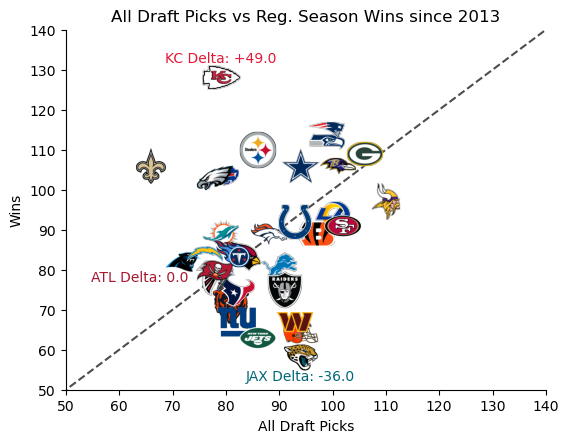

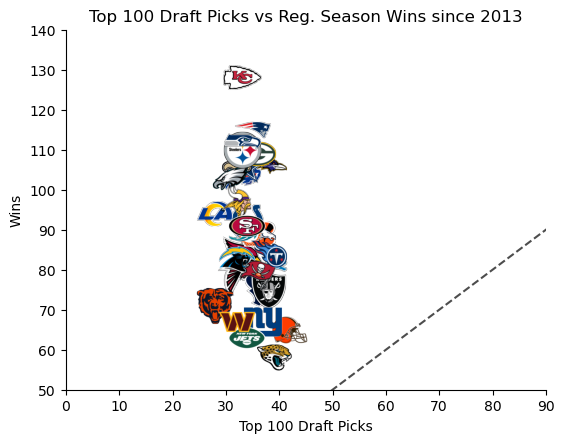

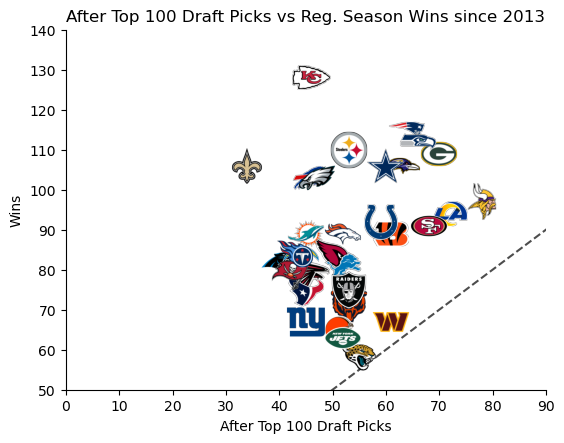

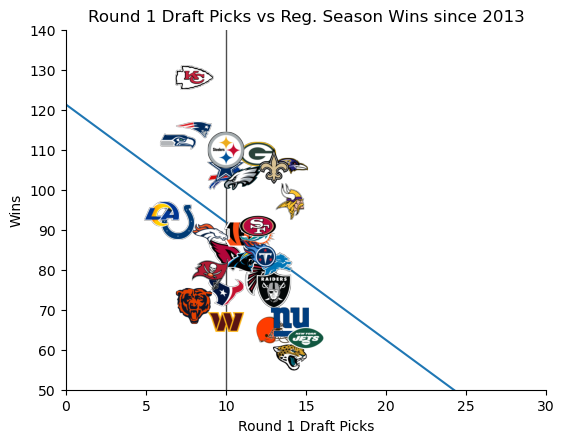

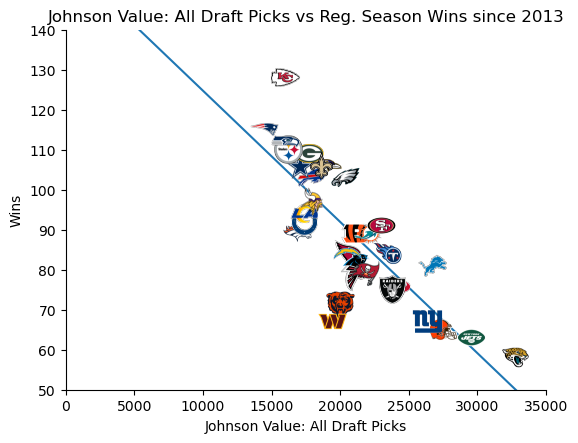

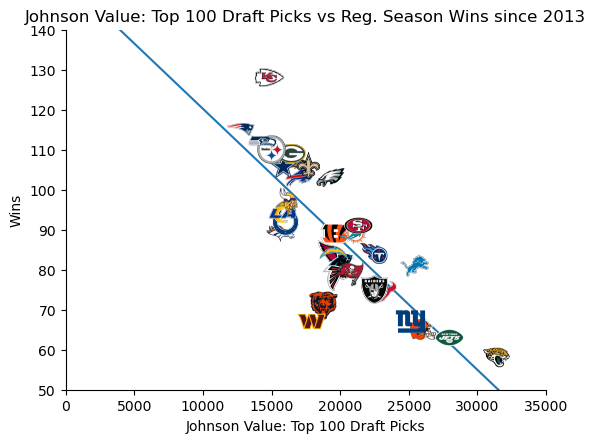

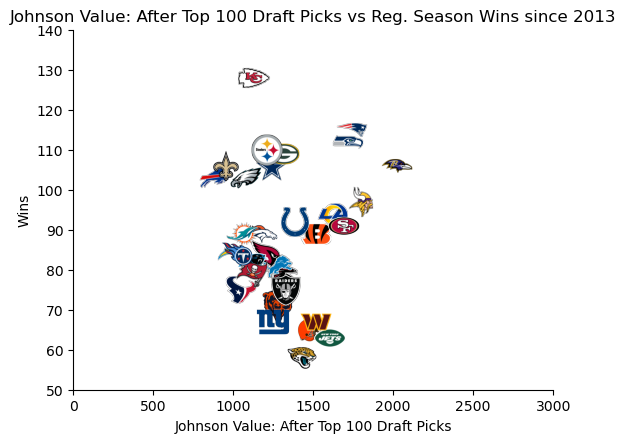

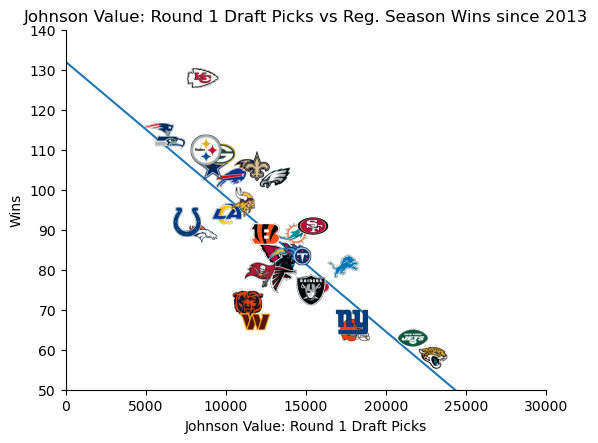

In [36]:
picksets = 3

curr_picks = ['all_picks','top_100_picks','after_100_picks','round_1_picks',
              'all_picks_val','top_100_picks_val','after_100_picks_val','round_1_picks_val',
              ]
curr_pick_label = ['All Draft Picks','Top 100 Draft Picks','After Top 100 Draft Picks','Round 1 Draft Picks',
                   'Johnson Value: All Draft Picks','Johnson Value: Top 100 Draft Picks','Johnson Value: After Top 100 Draft Picks','Johnson Value: Round 1 Draft Picks']


x_bounds = [[50,140],
            [0,90],
            [0,90],
             [0,30],
             [0,35000],
             [0,35000],
             [0,3000],
             [0,30000],]
x_scale = [10,10,10,10,
            2200,2200,210,2100]
for j,curr_pick_option in enumerate(curr_picks):

    curr_fig = plt.figure()
    curr_ax = curr_fig.add_axes([.2,.2,.75,.75])

    for i in range(len(team_win_v_picks)):
    #for i in range(5):

        curr_team = team_win_v_picks.index[i]
        curr_row = team_win_v_picks.loc[curr_team]
        #curr_ax.scatter(curr_row[curr_pick_option],curr_row['reg_wins'],color = team_desc.loc[curr_team,'team_color'])
        nfl_plot.logo_scatter_indiv(curr_ax,curr_row[curr_pick_option],curr_row['reg_wins'],x_scale[j],team_abbr = curr_team)

        #print(curr_team)
                

    unity_color = ".3" if j < 3 else 'none'
    unity_line = curr_ax.plot([0,200],[0,200],color = unity_color,ls = '--')

    #curr_ax.set_xlim([50,140])

    curr_ax.set_xlim(x_bounds[j])
    curr_ax.set_ylim([50,140])

    curr_ax.set_xlabel(curr_pick_label[j])
    curr_ax.set_ylabel('Wins')
    curr_ax.set_title(f'{curr_pick_label[j]} vs Reg. Season Wins since 2013')
    curr_ax.spines['top'].set_visible(False)
    curr_ax.spines['right'].set_visible(False)
    out = stats.linregress(team_win_v_picks[curr_pick_option],team_win_v_picks['reg_wins'])
    print(out,out.rvalue**2)

    if out.pvalue < 0.05:
        curr_ax.plot(np.arange(x_bounds[j][0],x_bounds[j][1]),np.arange(x_bounds[j][0],x_bounds[j][1])*out.slope + out.intercept,
        zorder = -50,)
    best_team = 'KC'
    if j == 0:
        curr_row = team_win_v_picks.loc[best_team]
        curr_ax.text(curr_row[curr_pick_option],curr_row['reg_wins'] +3 ,f'{best_team} Delta: +{curr_row["delta"]}' ,color = team_desc.loc[best_team,'team_color'],
                    ha= 'center',va = 'bottom')

        worst_team = 'JAX'

        curr_row = team_win_v_picks.loc[worst_team]
        curr_ax.text(curr_row[curr_pick_option],curr_row['reg_wins'] - 3 ,f'{worst_team} Delta: {curr_row["delta"]}' ,color = team_desc.loc[worst_team,'team_color'],
                                ha= 'center',va = 'top')

        mid_team = 'ATL'

        curr_row = team_win_v_picks.loc[mid_team]
        curr_ax.text(curr_row[curr_pick_option]-5,curr_row['reg_wins'] ,f'{mid_team} Delta: {curr_row["delta"]}' ,color = team_desc.loc[mid_team,'team_color'],
                            ha= 'right',va = 'center')
    if j == 3:
       #unity_line.set_visible(False)
       curr_ax.axvline(10,color = '.3',lw = 1,zorder = -5)


In [ ]:
for j,curr_pick_option in enumerate(curr_picks):

    out = stats.linregress(team_win_v_picks[curr_pick_option],team_win_v_picks['reg_wins'])
    print(out,out.rvalue**2)

for j,curr_pick_option in enumerate(curr_picks):

    out = stats.spearmanr(team_win_v_picks[curr_pick_option],team_win_v_picks['reg_wins'])
    print(out)

LinregressResult(slope=0.23420003451063018, intercept=68.50807821198609, rvalue=0.1429697448819744, pvalue=0.43503512708041936, stderr=0.2960040336939136, intercept_stderr=26.237766907655185) 0.020440347951616842
LinregressResult(slope=-1.5894378194207837, intercept=143.76192504258944, rvalue=-0.28337688271144285, pvalue=0.11603027133126206, stderr=0.9820667551418395, intercept_stderr=33.889308085713054) 0.08030245765525483
LinregressResult(slope=0.38402988030898955, intercept=68.51939673467078, rvalue=0.23004187322825773, pvalue=0.20529548042074897, stderr=0.29661355619651786, intercept_stderr=16.198824386081117) 0.052919263438365796
LinregressResult(slope=-2.9425454545454546, intercept=121.30909090909091, rvalue=-0.40146377047134435, pvalue=0.02276060795276574, stderr=1.2256101618665387, intercept_stderr=13.702738179240505) 0.16117315900106827
LinregressResult(slope=-0.0032785823150044604, intercept=157.52114496446555, rvalue=-0.8095577545793934, pvalue=2.016822787635025e-08, stderr=

In [ ]:
rvalue=-0.7806731821622144


AttributeError: 'Axes' object has no attribute 'background_patch'

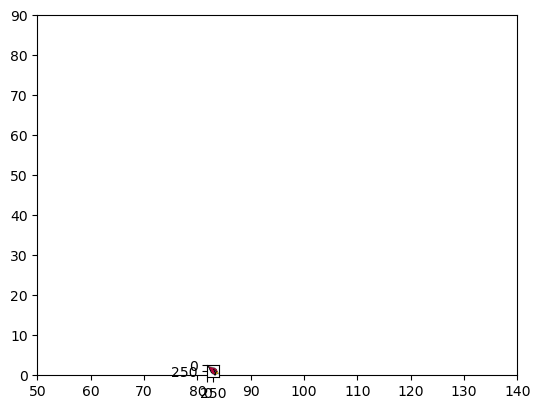

In [28]:
picksets = 3

curr_picks = ['all_picks','top_100_picks','after_100_picks','round_1_picks',
              'all_picks_val','top_100_picks_val','after_100_picks_val','round_1_picks_val',
              ]
curr_pick_label = ['All Draft Picks','Top 100 Draft Picks','After Top 100 Draft Picks','Round 1 Draft Picks',
                   'Johnson Value: All Draft Picks','Johnson Value: Top 100 Draft Picks','Johnson Value: After Top 100 Draft Picks','Johnson Value: Round 1 Draft Picks']


x_bounds = [[50,140],
            [0,90],
            [0,90],
             [0,30],
             [0,35000],
             [0,35000],
             [0,3000],
             [0,30000],]
x_scale = [3,3,3,3,
            200,200,200,200]
for j,curr_pick_option in enumerate(curr_picks):

    curr_fig = plt.figure()
    curr_ax = curr_fig.add_axes([.2,.2,.75,.75])
    curr_ax.set_xlim(x_bounds[j])
    curr_ax.set_ylim([0,90])
    #for i in range(len(team_win_v_picks)):
    for i in range(5):

        curr_team = team_win_v_picks.index[i]
        curr_row = team_win_v_picks.loc[curr_team]
        curr_ax.scatter(curr_row[curr_pick_option],curr_row['post_wins'],color = team_desc.loc[curr_team,'team_color'])
        nfl_plot.logo_scatter_indiv(curr_ax,curr_row[curr_pick_option],curr_row['post_wins'],x_scale[j],team_abbr = curr_team)
        #print(curr_team)
                

    unity_color = ".3" if j != 3 else 'none'
    unity_line = curr_ax.plot([0,200],[0,200],color = unity_color,ls = '--')

    #curr_ax.set_xlim([50,140])



    curr_ax.set_xlabel(curr_pick_label[j])
    curr_ax.set_ylabel('Wins')
    curr_ax.set_title(f'{curr_pick_label[j]} vs Reg. Season Wins since 2013')
    curr_ax.spines['top'].set_visible(False)
    curr_ax.spines['right'].set_visible(False)

    best_team = 'KC'
    if j < 0:
        curr_row = team_win_v_picks.loc[best_team]
        curr_ax.text(curr_row[curr_pick_option],curr_row['post_wins'] +3 ,f'{best_team} Delta: +{curr_row["delta"]}' ,color = team_desc.loc[best_team,'team_color'],
                    ha= 'center',va = 'bottom')

        worst_team = 'JAX'

        curr_row = team_win_v_picks.loc[worst_team]
        curr_ax.text(curr_row[curr_pick_option],curr_row['post_wins'] - 3 ,f'{worst_team} Delta: {curr_row["delta"]}' ,color = team_desc.loc[worst_team,'team_color'],
                                ha= 'center',va = 'top')

        mid_team = 'ATL'

        curr_row = team_win_v_picks.loc[mid_team]
        curr_ax.text(curr_row[curr_pick_option]-5,curr_row['post_wins'] ,f'{mid_team} Delta: {curr_row["delta"]}' ,color = team_desc.loc[mid_team,'team_color'],
                            ha= 'right',va = 'center')
    if j == 3:
#        unity_line.set_visible(False)
        curr_ax.axvline(10,color = '.3',lw = 1,zorder = -5)


LinregressResult(slope=0.23420003451063018, intercept=68.50807821198609, rvalue=0.1429697448819744, pvalue=0.43503512708041936, stderr=0.2960040336939136, intercept_stderr=26.237766907655185)
LinregressResult(slope=-1.5894378194207837, intercept=143.76192504258944, rvalue=-0.28337688271144285, pvalue=0.11603027133126206, stderr=0.9820667551418395, intercept_stderr=33.889308085713054)
LinregressResult(slope=0.38402988030898955, intercept=68.51939673467078, rvalue=0.23004187322825773, pvalue=0.20529548042074897, stderr=0.29661355619651786, intercept_stderr=16.198824386081117)
LinregressResult(slope=-2.9425454545454546, intercept=121.30909090909091, rvalue=-0.40146377047134435, pvalue=0.02276060795276574, stderr=1.2256101618665387, intercept_stderr=13.702738179240505)
LinregressResult(slope=-0.0032785823150044604, intercept=157.52114496446555, rvalue=-0.8095577545793934, pvalue=2.016822787635025e-08, stderr=0.0004340557347556901, intercept_stderr=9.236265245870293)
LinregressResult(slope=

In [ ]:
for j,curr_pick_option in enumerate(curr_picks):

    out = stats.linregress(team_win_v_picks[curr_pick_option],team_win_v_picks['post_wins'].fillna(0))
    print(out)

for j,curr_pick_option in enumerate(curr_picks):

    out = stats.spearmanr(team_win_v_picks[curr_pick_option],team_win_v_picks['post_wins'].fillna(0))
    print(out)

LinregressResult(slope=0.06276393820780848, intercept=-1.4939379353561408, rvalue=0.17693847282381236, pvalue=0.3326623533513231, stderr=0.06374121169598258, intercept_stderr=5.6500144069661165)
LinregressResult(slope=-0.14778534923339012, intercept=9.111371379897786, rvalue=-0.12167662615427688, pvalue=0.5070784169173603, stderr=0.220102335518591, intercept_stderr=7.595324675965838)
LinregressResult(slope=0.07827546853041321, intercept=-0.1687181083349838, rvalue=0.21653218341620933, pvalue=0.23391142290358952, stderr=0.06443398256538298, intercept_stderr=3.5189044676734995)
LinregressResult(slope=-0.7734545454545455, intercept=12.490909090909092, rvalue=-0.48731847420214913, pvalue=0.004671509029641329, stderr=0.2530387964460925, intercept_stderr=2.8290597489909755)
LinregressResult(slope=0.06276393820780848, intercept=-1.4939379353561408, rvalue=0.17693847282381236, pvalue=0.3326623533513231, stderr=0.06374121169598258, intercept_stderr=5.6500144069661165)
LinregressResult(slope=-0.

In [ ]:
curr_team

'WAS'

In [ ]:
curr_row = team_win_v_picks.loc[curr_team]
print(curr_row)

picks    32
wins     67
delta    35
Name: WAS, dtype: int64


In [ ]:
team_win_v_picks.index

Index(['ARI', 'ATL', 'BAL', 'BUF', 'CAR', 'CHI', 'CIN', 'CLE', 'DAL', 'DEN',
       'DET', 'GB', 'HOU', 'IND', 'JAX', 'KC', 'LAC', 'LAR', 'LV', 'MIA',
       'MIN', 'NE', 'NO', 'NYG', 'NYJ', 'PHI', 'PIT', 'SEA', 'SF', 'TB', 'TEN',
       'WAS'],
      dtype='object', name='team')

In [ ]:
team_win_v_picks = team_win_v_picks.reset_index()

In [ ]:
#team_win_v_picks


for i in range(len(offset_list)):
    team_win_v_picks[team_win_v_picks['team'] == offset_list[i][0]]['team'] = offset_list[i][1]

